# Pymaceuticals Inc.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st 
import numpy as np
# Read data into pandas
mouse_metadata = pd.read_csv('../data-visualization-challenge/Resources/Mouse_metadata.csv')
study_results = pd.read_csv('../data-visualization-challenge/Resources/Study_results.csv')
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [25]:
# Merge the data
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Find the number of unique mice id
combined_data['Mouse ID'].nunique()

249

In [26]:
# Find the duplicated mice
dup_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [27]:
# Create a df of the duplicated mice
dup_df = combined_data.loc[combined_data['Mouse ID'] == 'g989']
dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# Drop the duplicated mice
drop_df = combined_data.set_index('Mouse ID')
clean_df = drop_df.drop(['g989'])
clean_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...
m601,25,33.118756,1,Capomulin,Male,22,17
m601,30,31.758275,1,Capomulin,Male,22,17
m601,35,30.834357,1,Capomulin,Male,22,17


In [8]:
# Reset the index 
clean_mice = clean_df.reset_index()
clean_mice['Mouse ID'].nunique()

248

In [29]:
# Group the data by drug regimen then create a summary statistics dataframe of mean, median, var, std and sem
mean_tumor = clean_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor = clean_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance_tumor = clean_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_tumor = clean_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tumor = clean_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
regimen_df = pd.DataFrame({'Mean Tumor Volume': mean_tumor, "Median Tumor Variance": median_tumor,
                           "Variance Tumor Volume": variance_tumor, "Tumor Volume Std. Dev.": std_tumor,
                           "Tumor Volume Std. Err.": sem_tumor})
regimen_df

,Mean Tumor Volume,Median Tumor Variance,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


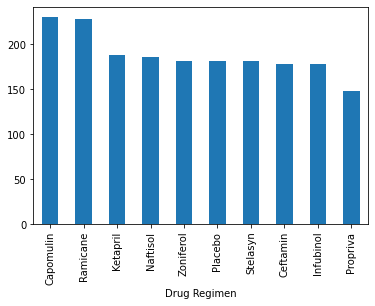

In [10]:
# Group the data by drug regimen and count the number of Mouse ID then create a bar graph of it using pandas 
mice_plot = clean_mice.groupby(['Drug Regimen'])['Mouse ID'].count()
mice_plot.sort_values(ascending=False).plot.bar(x='Drug Regimen', y='# of Observed Mouse Timepoints')
plt.show()

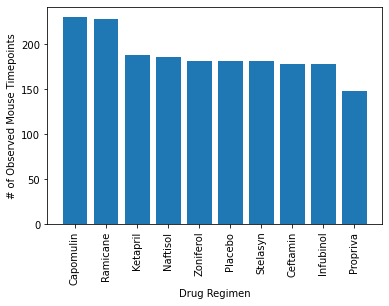

In [30]:
# Create a bar graph using pyplot
mice_plot1 = mice_plot.sort_values(ascending=False)
plt.bar(mice_plot1.index, mice_plot1.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()

In [31]:
# Groupby sex and count how many are female or male
cleaner_mice = clean_mice.groupby(['Sex'])['Sex'].count()
cleaner_mice

Sex
Female    922
Male      958
Name: Sex, dtype: int64

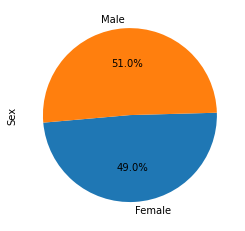

In [32]:
# Create a pie chart using pandas
cleaner_mice.plot.pie(autopct='%1.1f%%', startangle=185)
plt.show()

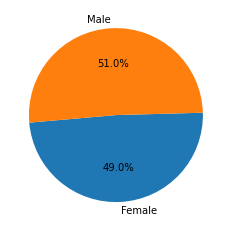

In [33]:
# Create a pie chart using pyplot
plt.pie(cleaner_mice, labels=["Female", 'Male'], autopct='%1.1f%%', startangle=185)
plt.show()

In [34]:
# Groupby Mouse ID and find the max timepoint for each then merge that data into a new dataframe along with the original data
final_mice1 = clean_mice.groupby(['Mouse ID'])['Timepoint'].max()
final_mice_df = pd.DataFrame(final_mice1)
final_df = pd.merge(clean_mice, final_mice_df, on=('Mouse ID', 'Timepoint'), how='right')
final_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [35]:
# Create a list to hold 4 drug names and then 4 other lists to stores the drug values with each name
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []
# Create a for loop that matches drug regiment with the drug names and puts the tumor volume of that drug into the specific drug list
for index, row in final_df.iterrows():
    if row['Drug Regimen'] == treatments[0]:
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
# Create a dataframe of the tumor volumes with each drug
drug_df = pd.DataFrame({treatments[0]: tumor_cap, treatments[1]: tumor_ram, treatments[2]: tumor_inf, treatments[3]: tumor_cef})
drug_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [24]:
# Find any potential outliers for each drug using quartiles and iqr
quartiles_inf = drug_df[treatments[2]].quantile([.25,.5,.75])
lower_inf = quartiles_inf[0.25]
upper_inf = quartiles_inf[0.75]
iqr_inf = upper_inf-lower_inf

lower_bound_inf = lower_inf - (1.5*iqr_inf)
upper_bound_inf = upper_inf + (1.5*iqr_inf)
print(f"Values below {lower_bound_inf} for infomulin could be outliers.")
print(f"Values above {upper_bound_inf} for infomulin could be outliers.")

quartiles_cap = drug_df[treatments[0]].quantile([.25,.5,.75])
lower_cap = quartiles_cap[0.25]
upper_cap = quartiles_cap[0.75]
iqr_cap = upper_cap-lower_cap

lower_bound_cap = lower_cap - (1.5*iqr_cap)
upper_bound_cap = upper_cap + (1.5*iqr_cap)
print(f"Values below {lower_bound_cap} for capomulin could be outliers.")
print(f"Values above {upper_bound_cap} for capomulin could be outliers.")

quartiles_ram = drug_df[treatments[1]].quantile([.25,.5,.75])
lower_ram = quartiles_ram[0.25]
upper_ram = quartiles_ram[0.75]
iqr_ram = upper_ram-lower_ram

lower_bound_ram = lower_ram - (1.5*iqr_ram)
upper_bound_ram = upper_ram + (1.5*iqr_ram)
print(f"Values below {lower_bound_ram} for ramicane could be outliers.")
print(f"Values above {upper_bound_ram} for ramicane could be outliers.")

quartiles_cef = drug_df[treatments[3]].quantile([.25,.5,.75])
lower_cef = quartiles_cef[0.25]
upper_cef = quartiles_cef[0.75]
iqr_cef = upper_cef-lower_cef

lower_bound_cef = lower_cef - (1.5*iqr_cef)
upper_bound_cef = upper_cef + (1.5*iqr_cef)
print(f"Values below {lower_bound_cef} for ceftamin could be outliers.")
print(f"Values above {upper_bound_cef} for ceftamin could be outliers.")

Values below 36.83290494999999 for infomulin could be outliers.
Values above 82.74144559000001 for infomulin could be outliers.
Values below 20.70456164999999 for capomulin could be outliers.
Values above 51.83201549 for capomulin could be outliers.
Values below 17.912664470000003 for ramicane could be outliers.
Values above 54.30681135 for ramicane could be outliers.
Values below 25.355449580000002 for ceftamin could be outliers.
Values above 87.66645829999999 for ceftamin could be outliers.


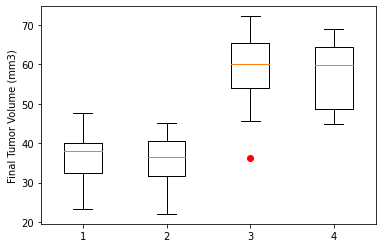

In [36]:
# Plot the values from the treatments in the boxplot to see if there are any outliers
box_plotlist = [drug_df[treatments[0]], drug_df[treatments[1]], drug_df[treatments[2]], drug_df[treatments[3]]]
fig, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.boxplot(box_plotlist, 0, 'red')
plt.show()

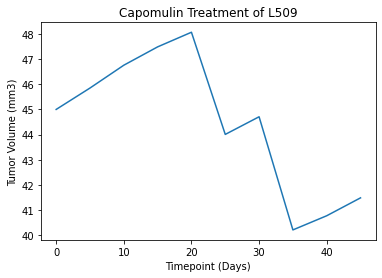

In [37]:
# Create a graph of a specific mouse id that looks at tumor volume in mice throughout the time trial
df = clean_mice.loc[clean_mice['Mouse ID'] == 'l509', :]
x_axis = df['Timepoint']
y_axis = df['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.title('Capomulin Treatment of L509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

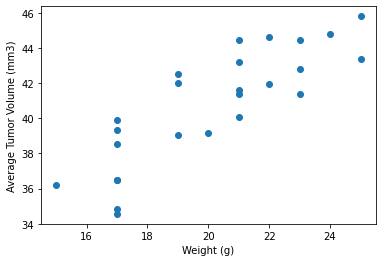

In [38]:
# Create a scatter plot of mouse weight vs tumor volume for the capomulin drug regimen
df_1 = clean_mice.loc[clean_mice['Drug Regimen'] == 'Capomulin', :]
mouse = df_1.groupby(['Mouse ID']).mean()
y_axis1 = mouse['Tumor Volume (mm3)']
x_axis1 = mouse['Weight (g)']
plt.scatter(x_axis1, y_axis1)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between weight and the average tumor volume is 0.84


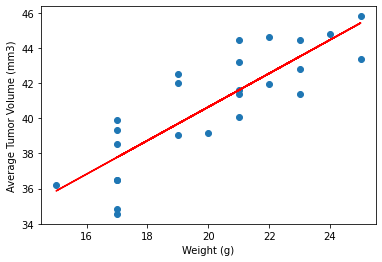

In [39]:
# Run a correlation and a regression on the previous scatter plot 
correlation = st.pearsonr(x_axis1, y_axis1)
print(f'The correlation between weight and the average tumor volume is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, std_err) = st.linregress(x_axis1, y_axis1)
regress_values = x_axis1 * slope + intercept
plt.scatter(x_axis1, y_axis1)
plt.plot(x_axis1, regress_values, 'r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()